# Titanic: Machine Learning from Disaster
Predict survival on the Titanic

<img src='titanic.jpg'>

## Description

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On **April 15, 1912**, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing **1,502** out of **2,224** passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

- One of the reasons that the shipwreck led to such loss of life was that:
    - there were not enough lifeboats for the passengers and crew.
    - Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as:
        - women, children, and the upper-class.


## Goal: 
Apply machine learning techniques to successfully predict which passengers survived the sinking of the Titanic

## Machine Learning "Binary Classification"

- Use pandas for data manipulation
- Use matplotlib and seaborn for data visualization
- Learn to build models with scikit-learn
- Use cross-validation to make sure your model generalizes to new data (i.e., it doesn’t “overfit”)
- Use parameter tuning and grid search to select the best performing model out of several different classification algorithms

### Feature Engineering
Using existing features to create new features to determine if they provide new signals to predict our outcome. For this dataset, we will create a title feature to determine if it played a role in survival.


### Metric
Score is the percentage of passengers that correctly predict. This is known simply as **"accuracy”**.


### XGBoost 
- Learn how to the extremely popular XGBoost algorithm


### Ensembling/Stacking:
- Use the fundamental skill of “ensembling” to combine the predictions of several models

## I. Exploratory Data Analysis (EDA)

With a dataset of 891 passenger samples for our training set and their associated labels containing features like sex, age, and class etc.. attempt to predict the survivors of a small test group of 418 samples in the same format.


| Variable Name | Description |
| --- | --- |
| PassengerId | Passenger's id |
| Survived | Survived (1) or died (0) |
| Pclass | Passenger’s class (1 = Upper, 2 = Middle, 3 = Lower)|
| Name | Passenger’s name |
| Sex | Passenger’s sex |
| Age | Passenger’s age |
| SibSp | Number of siblings/spouses aboard |
| Parch | Number of parents/children aboard |
| Ticket | Ticket number |
| Fare | Passenger’s fare |
| Cabin | Cabin number |
| Embarked | Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)|

In [1]:
# Data analysis and wrangling
import pandas as pd
import numpy as np

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rc

# Configure visualisations
%matplotlib inline
plt.style.use('ggplot')

# Configure seaborn
sns.set_style('white',{"xtick.major.size": 5, "ytick.major.size": 5})


plt.rcParams['figure.figsize'] = (15,6)
plt.rcParams['font.size'] = 14
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
plt.rcParams['legend.fontsize'] = 16
plt.rcParams['figure.titlesize'] = 18

import warnings
warnings.filterwarnings('ignore')


In [2]:
# The training set should be used to build your machine learning models.
train_df = pd.read_csv('train.csv')

# The test set should be used to see how well your model performs on unseen data. 
test_df = pd.read_csv('test.csv')

In [3]:
print(train_df.shape,test_df.shape)

(891, 12) (418, 11)


In [4]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train_df['Sex']= train_df['Sex'].str.capitalize()
test_df['Sex']= test_df['Sex'].str.capitalize()

In [6]:
# Combine train and test set
all_data = pd.concat([train_df,test_df],join_axes=[train_df.columns],ignore_index=True)

In [7]:
# Features are available in the dataset
print(train_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


## Data types

#### Categorical features
- **Nominal**: Survived, Sex, and Embarked. 
- **Ordinal**: Pclass 

#### Numerical features
- **Continous**: Age, Fare
- **Discrete**: SibSp, Parch

#### Features are mixed data types
Numerical, alphanumeric data within same feature. 
- **Ticket**: is a mix of numeric and alphanumeric data types. 
- **Cabin**: is alphanumeric.

Total samples are **891** or **40%** of the actual number of passengers on board the Titanic.

In [8]:
train_df.info()
print('--' * 20)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null

##  Missing Value

- **Age, Fare, Cabin and Embarked** features contain blank, null or empty values.

In [9]:
missingValue = pd.DataFrame(all_data.iloc[:,2:].isnull().sum(axis=0).sort_values(ascending=False),columns=['NaN'])
missingValue["Percentage"]= missingValue.NaN.apply(lambda x: '{:.2f}%'.format((float(x)/all_data.shape[0])*100))
missingValue[missingValue.NaN > 0] 

,NaN,Percentage
Cabin,1014,77.46%
Age,263,20.09%
Embarked,2,0.15%
Fare,1,0.08%


## Analyzing Features
Observations for all features:

- **Sex**: The chance of survival for women is high as compared to men.

- **Pclass**: Higher socio-economic status passenger survived more than others. Being a first class passenger have better chances of survival. The survival rate for Pclass3 is very low. For women, the chance of survival from Pclass1 is almost 1 and is high too for those from Pclass2. 

- **Age**: Younger passenger survived more than other passengers like children less than 5-10 years do have a high chance of survival. Passengers between age group 15 to 35 died a lot.

- **Embarked**: This is a very interesting feature. The chances of survival at C looks to be better than even though the majority of Pclass1 passengers got up at S. Passengers at Q were all from Pclass3.

- **Parch + SibSp **: Having 1-2 siblings,spouse on board or 1-3 Parents shows a greater chance of probablity rather than being alone or having a large family travelling with you.

## Target Variable
- **Survived**:

### How many Survived?
It is evident that not many passengers survived the accident. 
- Out of 891 passengers in training set, only **342** survived **38.4%** of the total training set survived.



In [10]:
# Text Annotation
def text_annotate(cnt):
    for i in cnt.patches:
        height = i.get_height()
        cnt.text(i.get_x() + i.get_width()/2., height,'%d' % int(height),ha='center',va='bottom')

In [11]:
pclass = {1:'Upper',2:'Middle',3:'Lower'}
survived = {0:'No',1:'Yes'}
embark = {'C':' Cherbourg', 'Q': 'Queenstown', 'S': 'Southampton'}

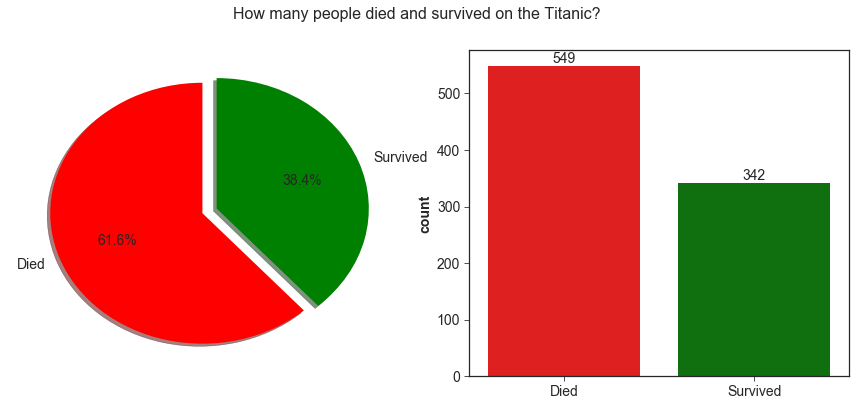

In [12]:
fig,axes=plt.subplots(1,2)
plt.suptitle('How many people died and survived on the Titanic?',fontsize=16)
labels = ['Died','Survived']
# Pie chart
train_df['Survived'].value_counts().plot.pie(explode=[0,0.1], autopct='%1.1f%%', ax=axes[0],
                                             labels=labels,colors=['red','green'], shadow=True, startangle=90)

axes[0].set_ylabel('')
# Bar chart
cnt = sns.countplot('Survived', data=train_df, palette=['red', 'green'], ax=axes[1])
axes[1].set_xlabel('')
axes[1].set_xticklabels(labels)
text_annotate(cnt)
plt.show()


### Passenger’s Gender


**Is there a pattern for the survivability based on gender?**






** How many women and men survived?**
- It looks like more female survived than males!



In [13]:
train_df.groupby(['Sex','Survived'])['Survived'].count().unstack().rename(columns=survived)

Survived,No,Yes
Sex,,
Female,81,233
Male,468,109


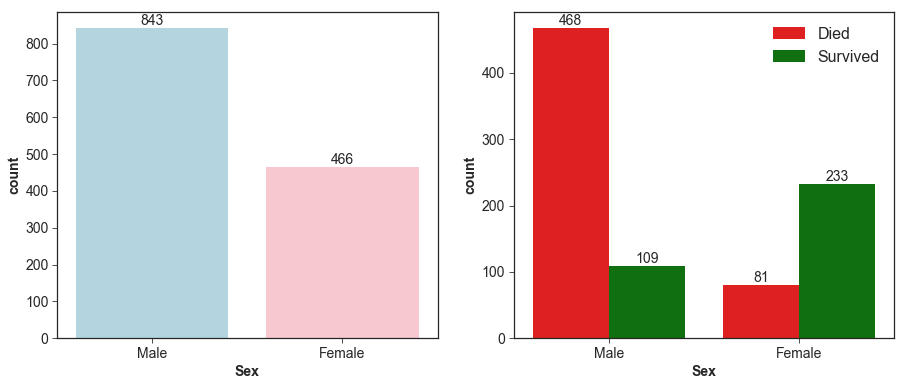

In [14]:
f,ax=plt.subplots(1,2)
cnt2 = sns.countplot(x='Sex', data=all_data, palette=['lightblue', 'pink'],ax=ax[0])
text_annotate(cnt2)
cnt = sns.countplot(x='Sex', hue='Survived', data=train_df, palette=['red', 'green'],ax=ax[1])
ax[1].legend(['Died','Survived'])
text_annotate(cnt)

In [15]:
def get_stats(survival):
    return {'Died':survival.count()-survival.sum(),'Survived': survival.sum(),'All': survival.count(),
            'Survived(%)':'{:.2f}%'.format(survival.mean()*100)}

The proportion of women that survived, along with the proportion of men:
- About the survival rate for genders, **74%** female passengers survived, while only **19%** male passengers survived.

This is a strong indication that if the passenger was a female, she had a better chance of surviving than a male. 

In [16]:
train_df['Survived'].groupby(train_df['Sex']).apply(get_stats).unstack()

,All,Died,Survived,Survived(%)
Sex,,,,
Female,314,81,233,74.20%
Male,577,468,109,18.89%


### Pclass
Passenger’s class
- 1 = Upper
- 2 = Middle
- 3 = Lower



Passenegers Of Pclass 1 were given a very high priority while rescue. Even though the the number of Passengers in Pclass 3 were a lot higher and the number of survival from them is very low.

It looks like:
- 63% First class passenger survived titanic tragedy, while
- 48% Second class and
- only 24% Third class passenger survived.

In [17]:
train_df['Survived'].groupby(train_df['Pclass']).apply(get_stats).unstack().rename(index=pclass)

,All,Died,Survived,Survived(%)
Pclass,,,,
Upper,216,80,136,62.96%
Middle,184,97,87,47.28%
Lower,491,372,119,24.24%


People in the first class have more chances survived than the lower classes.

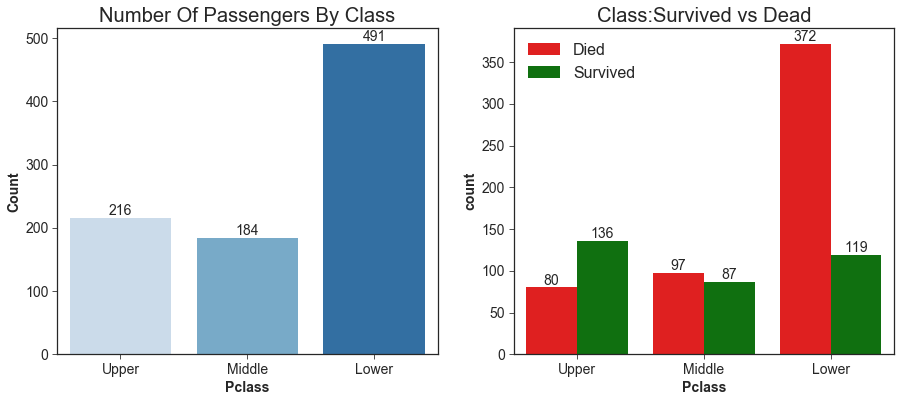

In [18]:
f,ax=plt.subplots(1,2)
labels = ['Upper','Middle','Lower']
cnt= sns.countplot('Pclass',palette='Blues',data=train_df, ax=ax[0])
ax[0].set_title('Number Of Passengers By Class')
ax[0].set_ylabel('Count')
ax[0].set_xticklabels(labels)
text_annotate(cnt)

cnt2 = sns.countplot('Pclass',hue='Survived',palette=['red', 'green'], data=train_df, ax=ax[1])
ax[1].set_title('Class:Survived vs Dead')
ax[1].set_xticklabels(labels)
ax[1].legend(['Died','Survived'])
text_annotate(cnt2)

plt.show()

**Lets check survival rate with Sex and Pclass together**.



Looking at the CrossTab and the FactorPlot, we can easily infer that survival for Women from Pclass1 is about 95-96%, as only 3 out of 94 Women from Pclass1 died.


- Women were given first priority while rescue. Even Men from Pclass1 have a very low survival rate.

In [19]:
train_df.pivot_table(index='Sex', columns='Pclass', aggfunc={'Survived':'sum'}).rename(columns=pclass)

Survived             
Pclass    Upper Middle Lower
Sex                         
Female       91     70    72
Male         45     17    47

In [20]:
average = lambda x: '{:.2f}%'.format(np.mean(x)*100)
train_df.pivot_table(index='Sex', columns='Pclass', aggfunc={'Survived': average}).rename(columns=pclass)

Survived                
Pclass    Upper  Middle   Lower
Sex                            
Female   96.81%  92.11%  50.00%
Male     36.89%  15.74%  13.54%

In [21]:
pd.crosstab([train_df['Sex'],train_df['Survived']],train_df['Pclass'],
            margins=True).rename(columns=pclass,index=survived)

Pclass           Upper  Middle  Lower  All
Sex    Survived                           
Female No            3       6     72   81
       Yes          91      70     72  233
Male   No           77      91    300  468
       Yes          45      17     47  109
All                216     184    491  891

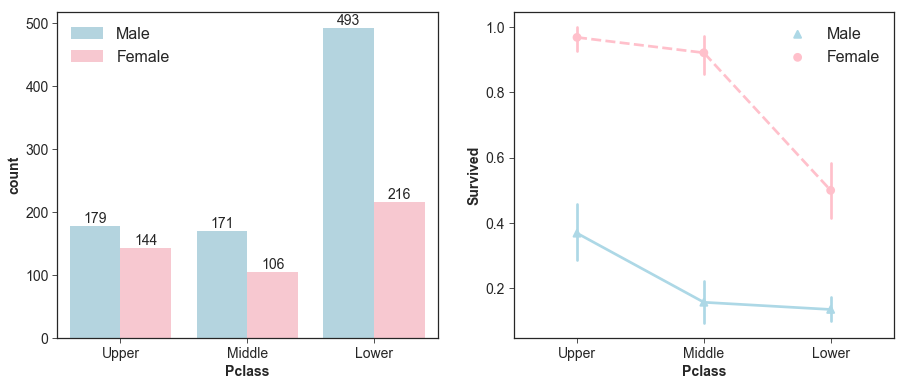

In [22]:
f,ax=plt.subplots(1,2)
cnt = sns.countplot('Pclass',hue='Sex',palette=['Lightblue', 'Pink'], data=all_data, ax=ax[0])
ax[0].set_xticklabels(labels)
ax[0].legend().set_title('')
text_annotate(cnt)
cnt2 = sns.pointplot(x='Pclass', y='Survived', hue='Sex', data=train_df,
              palette={'Male': 'lightblue', 'Female': 'pink'},
              markers=['^', 'o'], linestyles=['-', '--'],ax=ax[1])
ax[1].set_xticklabels(labels)
ax[1].legend().set_title('')
plt.show()

### Age


- Survival chances for Passenegers aged 20-50 from Pclass1 is high and is even better for Women.

- For males, the survival chances decreases with an increase in age.

- Women and children were given priority when passengers were evacuated to the rescue boats.



In [23]:
print('Oldest Passenger was of:',all_data['Age'].max())
print('Youngest Passenger was of:',all_data['Age'].min())

Oldest Passenger was of: 80.0
Youngest Passenger was of: 0.17


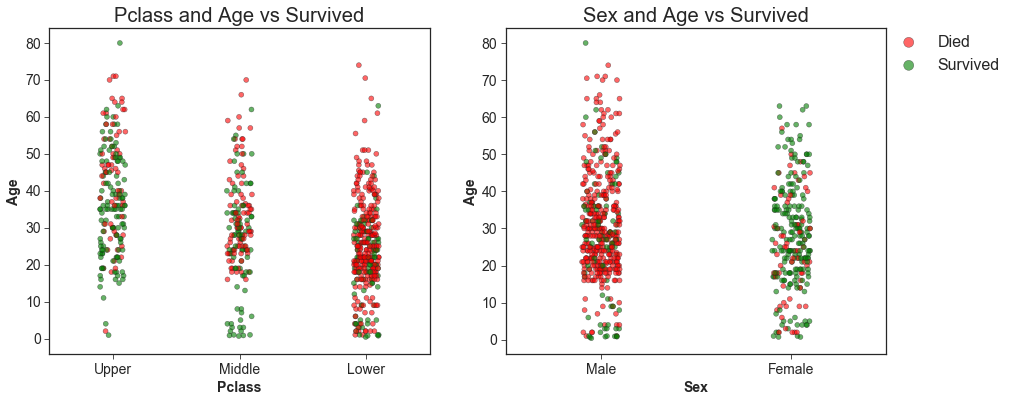

In [24]:
f,ax=plt.subplots(1,2)
sns.stripplot(y='Age', x='Pclass', hue='Survived', jitter=True, 
              linewidth=0.5, palette= ['red','green'], alpha=.60, data=all_data, ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_xticklabels(labels)
ax[0].legend_.remove()
sns.stripplot(y='Age', x='Sex', hue='Survived', jitter=True, 
              linewidth=0.5, palette= ['red','green'],alpha=.60, data=all_data, ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[0].set_xticklabels(labels)
plt.legend(['Died','Survived'],bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.,markerscale=2)
plt.show()


It seems that if the passenger is female most survive, and if they were male most don’t, regardless of whether they were children or not.

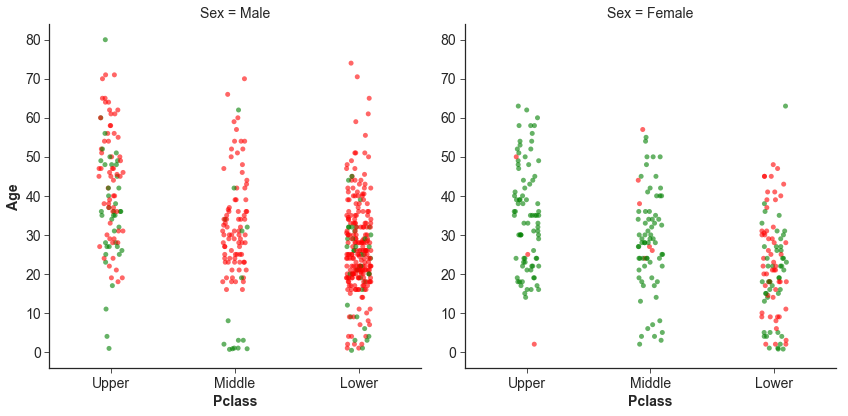

In [25]:
scatplot = sns.factorplot(x="Pclass", y="Age",hue="Survived", col="Sex",
               kind="strip", palette= ['red','green'], jitter=True, size=6, alpha=.60,legend=False,data= all_data)
scatplot.set_xticklabels(labels);

As we had seen earlier, the **Age** feature has **263** null values. In order to replace these **NaN** values, we can assign them the mean age of the dataset. But the problem is, there were many people with different ages. So looking upon the  **Name** feature, we can see that the names have a salutation like Mr or Mrs. Thus we can assign the mean values of Mr and Mrs to the respective groups.

### Extracting Salutation from Names
Extracting a Title from each name, as that carries information about social and marital status which in turn may relate to survival.

- Using Regex: **[A-Za-z]+)** it looks for strings which lie between A-Z or a-z and followed by a **\\.** (dot) to extract the from the Name.

In [26]:
all_data['Title'] = 0
for i in all_data:
    all_data['Title'] = all_data['Name'].str.extract('([A-Za-z]+)\.') 

In [27]:
pd.crosstab(all_data['Title'],all_data['Sex']).T

Title,Capt,Col,Countess,Don,Dona,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,,
Female,0,0,1,0,1,1,0,1,0,0,260,2,1,0,197,2,0,0
Male,1,4,0,1,0,7,1,0,2,61,0,0,0,757,0,0,8,1


In [28]:
officer = ['Capt','Col','Dr','Major','Rev']
nobility = ['Countess','Don','Dona','Jonkheer','Lady','Sir']
all_data['Title'].replace(officer, 'Officer', inplace=True)
all_data['Title'].replace(nobility, 'Nobility', inplace=True)
all_data['Title'].replace(['Mlle','Ms', 'Mme'], ['Miss', 'Miss', 'Mrs'],inplace=True)

In [29]:
all_data.groupby(['Sex', 'Title']).size().unstack(fill_value=0)

Title,Master,Miss,Mr,Mrs,Nobility,Officer
Sex,,,,,,
Female,0,264,0,198,3,1
Male,61,0,757,0,3,22


In [30]:
# Check missing value of Age per Title
all_data.groupby('Title')['Age'].agg({'Missing Value': lambda x: x.isnull().sum()})

,Missing Value
Title,
Master,8.0
Miss,51.0
Mr,176.0
Mrs,27.0
Nobility,0.0
Officer,1.0


In [31]:
# Check the Average Age by Sex, Title and Passenger Class.
group_mean = all_data.groupby(['Sex','Pclass','Title'])['Age'].mean().round()
group_mean

Sex     Pclass  Title   
Female  1       Miss        30.0
                Mrs         43.0
                Nobility    40.0
                Officer     49.0
        2       Miss        21.0
                Mrs         34.0
        3       Miss        17.0
                Mrs         32.0
Male    1       Master       7.0
                Mr          41.0
                Nobility    42.0
                Officer     51.0
        2       Master       3.0
                Mr          32.0
                Officer     41.0
        3       Master       6.0
                Mr          28.0
Name: Age, dtype: float64

Passengers with the title **Miss**, **Mrs** and **Master** had a better rate of survival than that of the other. Whereas **Mr** had a high death rate.
- This coincides with the findings of the rate of survival by gender, where females were more likely to survive than males except for the "Master" title. 
- The **"Master"** title, seems to be a title give to children around the age of 4. This partly confirms the "Women and Children first" when escaping the ship.  

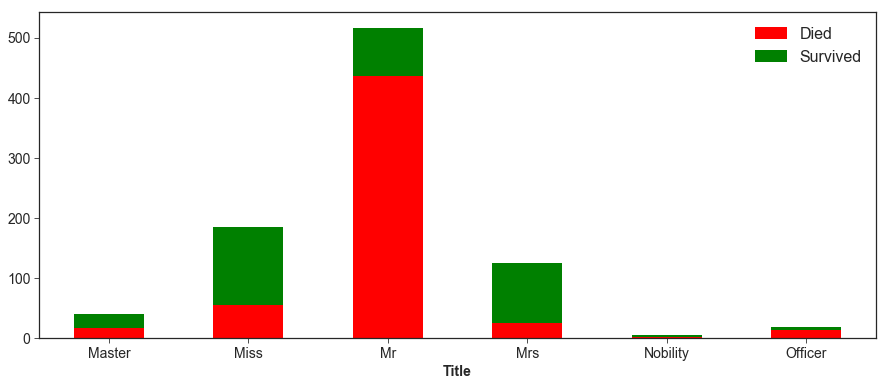

In [32]:
title_survival = all_data.groupby(['Title','Survived'])['Survived'].count().unstack('Survived')
title_survival.plot(kind='bar',colors=['red','green'],stacked=True,rot=360)
plt.legend(['Died','Survived'])
plt.show()

## Imputation
Filling missing value.

### Age

In [33]:
# Fill missing age with the average Age by Sex, Title and Passenger Class.
all_data['Age'].fillna(all_data.groupby(['Sex','Pclass','Title'])['Age'].transform('mean'),inplace=True)

### Fare
The passenger on row 1044 has an NaN Fare value. Impute the missing value of fare with median for passenger class and embarkment.

In [34]:
all_data[pd.isnull(all_data['Fare'])]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
1043,1044,NaN,3,"Storey, Mr. Thomas",Male,60.5,0,0,3701,NaN,NaN,S,Mr


In [35]:
# Fill missing fare value with median fare for class and embarkment
all_data['Fare'].fillna(all_data.groupby(['Pclass','Embarked'])['Fare'].transform("median"), inplace=True)

The fare for first class were predictably much higher than those for second and third class.

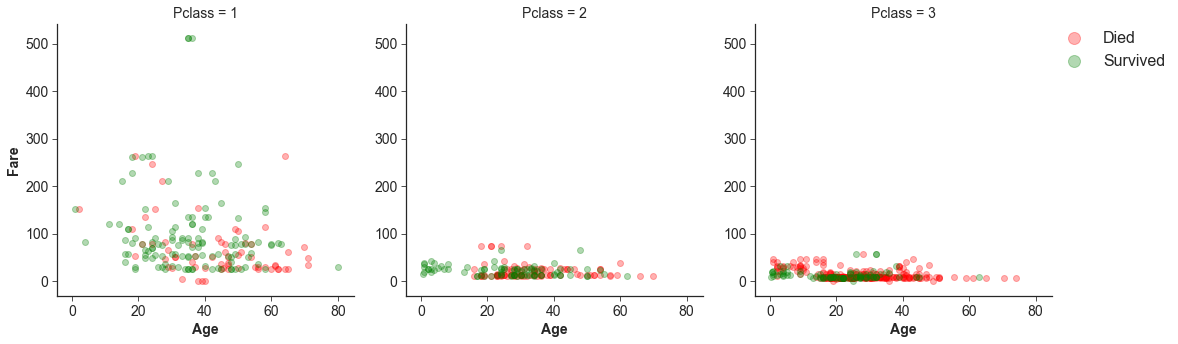

In [36]:
# Plot a scatter plot of 'Age' against 'Fare'.
sns.lmplot(x='Age', y='Fare', hue='Survived',col='Pclass', palette=['red','green'],
           data=train_df, fit_reg=False, scatter_kws={'alpha':0.3},legend=False)
plt.legend(['Died','Survived'],bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.,markerscale=2)
plt.show()

### Embarkment
- Although I feel that the city of Embarked should not be related to survival rates, I still wanted to check it. As you can see below, there somehow are significant differences between the three ports of embarkment.


In [37]:
# Fill Embarked NaN values of 'S' most frequent value "Embarked" (S).
all_data['Embarked'].fillna(all_data['Embarked'].mode()[0], inplace = True)

We can see that a person embarked on Cherbourg Port has a higher chance of surviving compared to those embarked on Southampton Port and Queenstown Port.

In [38]:
train_df['Survived'].groupby(train_df['Embarked']).apply(get_stats).unstack().rename(index=embark)

,All,Died,Survived,Survived(%)
Embarked,,,,
Cherbourg,168,75,93,55.36%
Queenstown,77,47,30,38.96%
Southampton,644,427,217,33.70%


**Embarked vs Gender**

In [39]:
train_df.pivot_table(index='Sex', columns='Embarked', aggfunc={'Survived': average}).rename(columns=embark)

Survived                       
Embarked  Cherbourg Queenstown Southampton
Sex                                       
Female       87.67%     75.00%      68.97%
Male         30.53%      7.32%      17.46%

**Embarked vs Passenger's Class**

The lower class is the most frequent for passenger coming from Southampton (S) and Queenstown (Q), whereas Cherbourg passengers are mostly in upper class which have the highest survival rate.

In [40]:
train_df.pivot_table(index='Pclass', columns='Embarked', aggfunc={'Survived': average}).rename(index=pclass,columns=embark)

Survived                       
Embarked  Cherbourg Queenstown Southampton
Pclass                                    
Upper        69.41%     50.00%      58.27%
Middle       52.94%     66.67%      46.34%
Lower        37.88%     37.50%      18.98%

We can see from the plot that people of higher social-economic status upper class tend to have a higher chance of surviving compared to those of lower social-economic status.

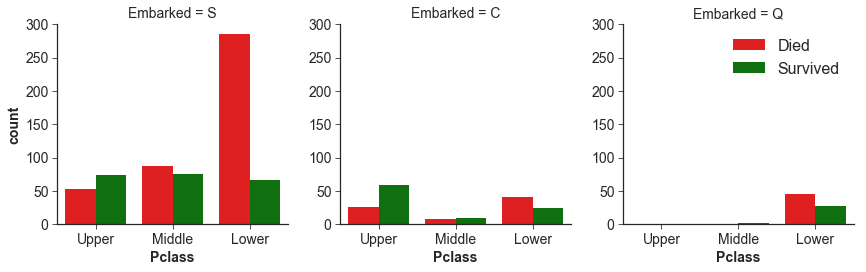

In [41]:
embark = sns.factorplot(x='Pclass',hue='Survived', col='Embarked',
               kind='count', palette= ['red','green'], legend=False, data= train_df)
embark.set_xticklabels(labels)
plt.legend(['Died','Survived']);

### SibSp
Number of siblings/spouses aboard.

In [42]:
def survival_chart(feature,target_var):
    sns.factorplot(x=feature, y=target_var, data=train_df, kind="bar", size = 6 , palette = "muted")    

- It seems that passengers having a lot of siblings/spouses have less chance to survive.
- Single passengers or with 1 or 2 siblings/spouses have more chance to survive the disaster.


In [43]:
train_df['Survived'].groupby(train_df['SibSp']).apply(get_stats).unstack()

,All,Died,Survived,Survived(%)
SibSp,,,,
0,608,398,210,34.54%
1,209,97,112,53.59%
2,28,15,13,46.43%
3,16,12,4,25.00%
4,18,15,3,16.67%
5,5,5,0,0.00%
8,7,7,0,0.00%


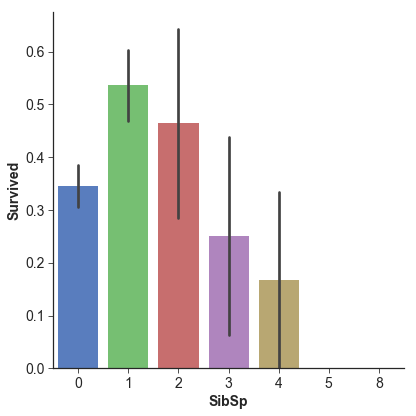

In [44]:
# Explore SibSp feature vs Survived
survival_chart('SibSp','Survived')

Small families have more chance to survive.

### Parch
Number of parents/children aboard.

We can see a high standard deviation in the survival with 3 parents/children person's. Also that small families (1~2) have more chance to survival than single or big families.

In [45]:
train_df['Survived'].groupby(train_df['Parch']).apply(get_stats).unstack().sort_values(by='Survived(%)',ascending=False)

,All,Died,Survived,Survived(%)
Parch,,,,
3,5,2,3,60.00%
1,118,53,65,55.08%
2,80,40,40,50.00%
0,678,445,233,34.37%
5,5,4,1,20.00%
4,4,4,0,0.00%
6,1,1,0,0.00%


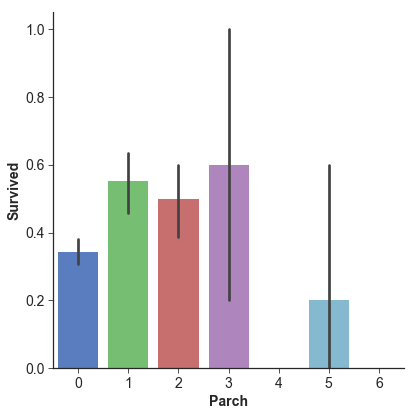

In [46]:
# Explore Parch feature vs Survived
survival_chart('Parch','Survived')

## Do families sink or swim together?
In order to create the family size for each person on the boat, I will add up his/her number of parents/children, his/her number of siblings/spouses, and of course add one (the person himself).

- First we’re going to make a **FamilySize** variable based on number of siblings/spouse. 
    - SibSp and Parch can be combined to compute the **FamilySize** associated with a passenger. 
   

In [47]:
all_data['FamilySize'] = all_data['Parch'] + all_data['SibSp'] + 1

Below, you can easily see that solo travelers had a much higher chance to die than to survive. In addition, people traveling in families of 2-4 people actually had a relatively high chance to survive. This chance is significantly lower among 5+ families.

In [48]:
all_data['Survived'].groupby(all_data['FamilySize']).apply(get_stats).unstack().sort_values(by='Survived(%)',ascending=False)

,All,Died,Survived,Survived(%)
FamilySize,,,,
4,29,8,21,72.41%
3,102,43,59,57.84%
2,161,72,89,55.28%
7,12,8,4,33.33%
1,537,374,163,30.35%
5,15,12,3,20.00%
6,22,19,3,13.64%
8,6,6,0,0.00%
11,7,7,0,0.00%


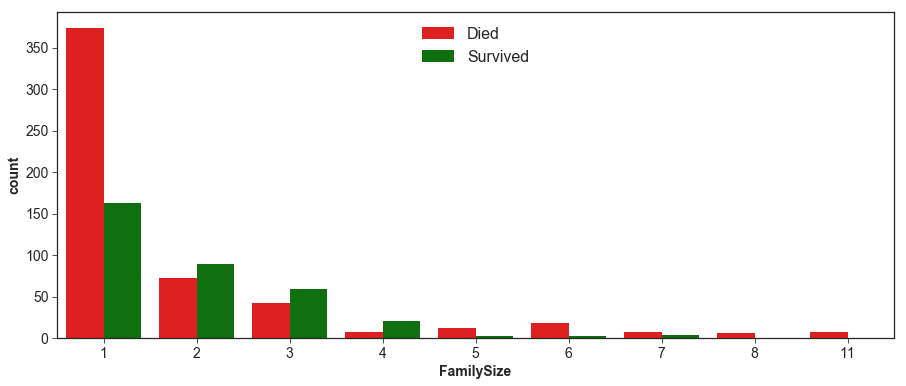

In [49]:
cnt = sns.countplot('FamilySize',hue='Survived',palette=['red', 'green'],data=all_data)
cnt.legend(['Died','Survived'])
plt.show()

If person had 5 family members or more (including themselves) then more likely the person didn’t survive especially in the third class which had entire families onboard.

Create a new feature **TraveledAlone** to check if a passenger was traveling alone or not.



In [50]:
all_data['TraveledAlone'] = (all_data['FamilySize'] == 1).astype(int)

We can see that only **30%** of the people who travelled alone survived.

In [51]:
all_data['Survived'].groupby(all_data['TraveledAlone']).apply(get_stats).unstack().rename(index=survived)

,All,Died,Survived,Survived(%)
TraveledAlone,,,,
No,354,175,179,50.56%
Yes,537,374,163,30.35%


### Survival vs Age

We may want to know the distribution of the passenger's age on board.

The passengers who are less than 10 are more likely to survive than older ones who are more than 12 and less than 50. Older passengers seem to be rescued too.

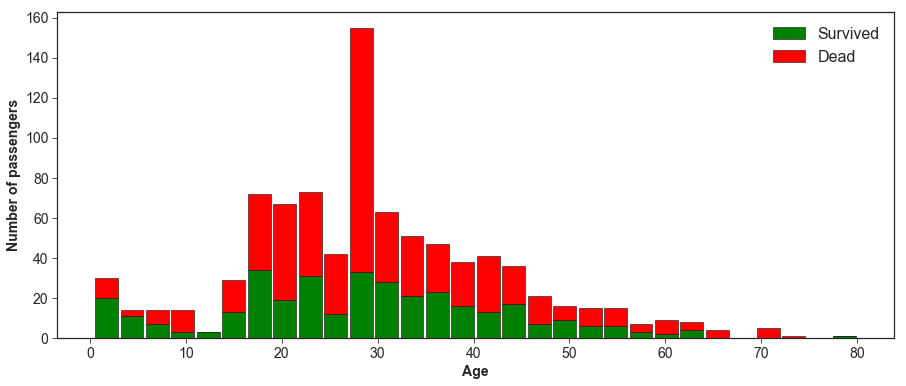

In [52]:
plt.hist([all_data[all_data['Survived']==1]['Age'], all_data[all_data['Survived']==0]['Age']], stacked=True, color = ['g','r'],
         bins = 30,label = ['Survived','Dead'],edgecolor='black',rwidth=0.9)
plt.xlabel('Age')
plt.ylabel('Number of passengers')
plt.legend();

#### Age Groupings

In [53]:
def age_range(passenger):
    if passenger['Age'] < 13:
        return 'Child'
    elif passenger['Age'] >= 13 and passenger['Age'] <=19:
        return 'Teenager'
    elif passenger['Age'] >= 20 and passenger['Age'] <=35:
        return 'Young Adult'
    elif passenger['Age'] >= 36 and passenger['Age'] <=55:
        return 'Adult'
    else:
        return 'Elder'

In [54]:
all_data['AgeGrp']= all_data.apply(age_range, axis=1) 

We can see how many people are died and survived in each category.

In [55]:
all_data['Survived'].groupby(all_data['AgeGrp']).apply(get_stats).unstack().sort_values(by='Survived(%)', ascending=False)

,All,Died,Survived,Survived(%)
AgeGrp,,,,
Child,73,31,42,57.53%
Teenager,128,70,58,45.31%
Adult,206,122,84,40.78%
Young Adult,444,298,146,32.88%
Elder,40,28,12,30.00%


It seems like the passanger of age group 20-50 were most likely to survive.

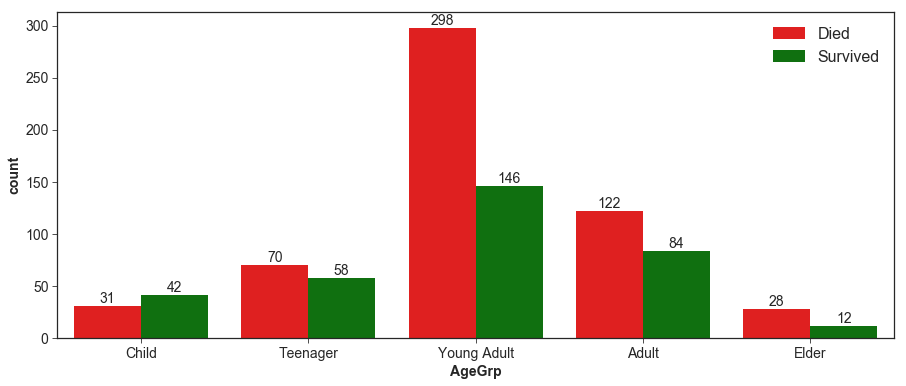

In [56]:
cnt = sns.countplot('AgeGrp',hue='Survived',palette=['red', 'green'],order=['Child','Teenager','Young Adult','Adult','Elder'],
                    data=all_data)
cnt.legend(['Died','Survived'])
text_annotate(cnt)
plt.show()

In [ ]:
# Split the dataframe into its original train and test set
train_df = all_data[0:len(train_df)]
test_df = all_data[len(train_df):]
test_df.drop(['Survived'],axis=1, inplace=True)

In [ ]:
drop_column = ['PassengerId','Name','Cabin', 'Ticket']
all_data.drop(drop_column, axis=1, inplace = True)